## 2_26_25 

## Error Analysis...comparing angular errors to smallest angle where 100% accuracy is predicted

In [9]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

### bar plot of min angle where mean accuracy is 100%

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/first\\Bending_data_abs_1p822_s1_12_9_24.csv']
ADC normalized with initial value R₀: -103.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p3\\Bending_data_abs_2p3_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/first\\Bending_data_abs_1p822_s1_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.

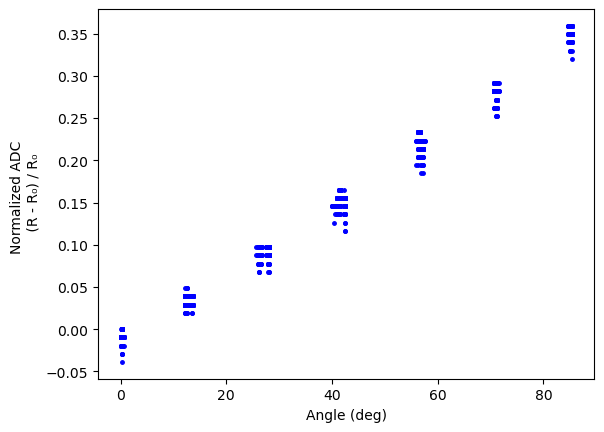

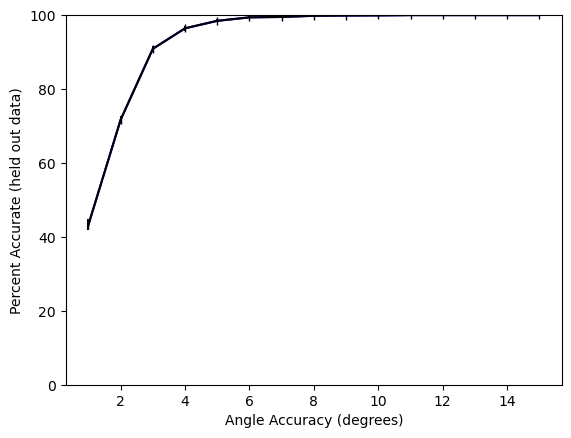

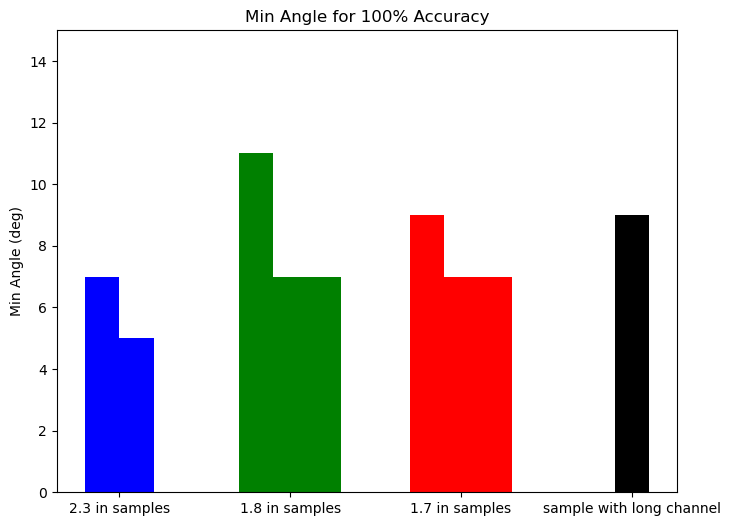

In [10]:
# varying abs channel length

# 2p3 samples

# abs 2p3
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p3/*.csv")
# abs 2p31
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p31/*.csv")

group_1 = [DS1_datafiles, DS2_datafiles]


# 1p8 samples

# abs_1p822_s1
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/12_9_2024/first/*.csv")
g = bender_class()
g.load_data(DS3_datafiles)
g.normalize_adc_over_R0()
g.plot_data()
g.train_model_test_accuracy()
g.plot_accuracy()

# abs_1p86_s2
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")
# abs_1p897_s4
DS5_datafiles = os.path.join(path_to_repository , "CSV Data/12_9_2024/fourth/*.csv")

group_2 = [DS3_datafiles, DS4_datafiles, DS5_datafiles]


# 1p7 samples

# abs_1p7_1st_reapply
DS6_datafiles = os.path.join(path_to_repository , "CSV Data/2_4_2025/first test/*.csv")
# abs_1p758_1st_reapply
DS7_datafiles = os.path.join(path_to_repository , "CSV Data/2_6_2025/first test/*.csv")
# abs_1p732_0deg
DS8_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p732/*.csv")

group_3 = [DS6_datafiles, DS7_datafiles, DS8_datafiles]


# sample abs_100 -> 8 inch channel length
DS9_datafiles = os.path.join(path_to_repository , "CSV Data/10_25_2024/voltage divider circuit/*.csv")

group_4 = [DS9_datafiles]

ma_100_list = []  # Will hold lists of values per group

for group in [group_1, group_2, group_3, group_4]:  # Loop over groups
    group_values = []
    for datafiles in group:  # Loop over datasets in each group
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_bw_01()
        g.train_model_test_accuracy()
        min_angle_100, min_acc = g.get_min_accuracy_100()
        group_values.append(min_angle_100)  # Collect values per group
    ma_100_list.append(group_values)  # Append each group’s results as a sublist

print(ma_100_list)

bar_labels = ['2.3 in samples', '1.8 in samples', '1.7 in samples', 'sample with long channel']

colors = ["b", "g", "r", "k"]  # Assign different colors to different groups

g.plot_bar_chart(ma_100_list, 
               bar_labels, 
               title="Min Angle for 100% Accuracy", 
               ylabel="Min Angle (deg)", 
               colors=colors,
               ylim=(0, 15))

## Comparing raw data to trained model and then showing accuracy vs angle plot

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_6_2025/fourth test\\Bending_data_abs_1p758_4th_reapply_2_6_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0


C:\Users\toppenheim\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


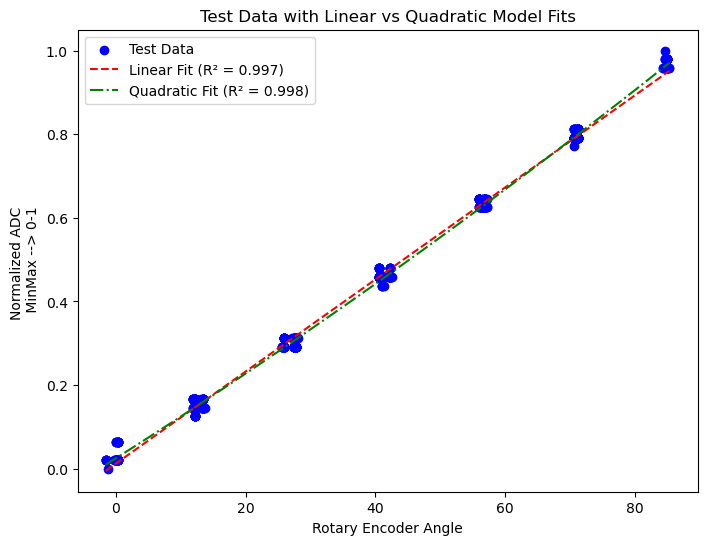

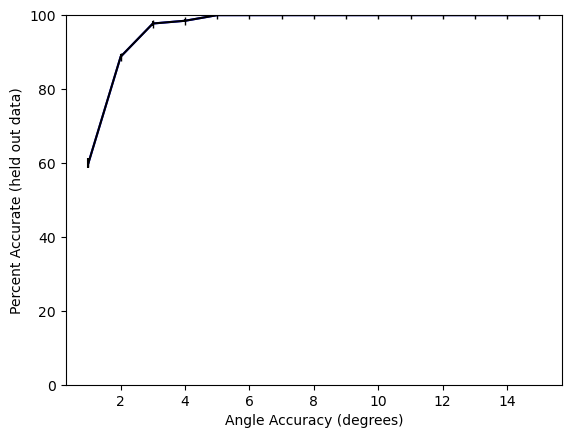

In [11]:
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/2_6_2025/fourth test/*.csv")
DS_all = [DS1_datafiles]


# Load and normalize data
g.load_data(DS1_datafiles)
g.normalize_adc_bw_01()

# Train the model
g.train_model_test_accuracy()

# Overlay 1st iteration (n = 1) trained linear and quad model on test data and show R^2
g.fig_1_lin_vs_quad(perc_train=0.8, random_state=None,
                          data_color='blue', lin_color='red', quad_color='green')

g.plot_accuracy()



###  box plot of angular error: Box Plot where one box corresponds to angular error from testing data from single dataset.

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p3\\Bending_data_abs_2p3_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/first\\Bending_data_abs_1p822_s1_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/fourth\\Bending_data_abs_1p897_s4_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC m

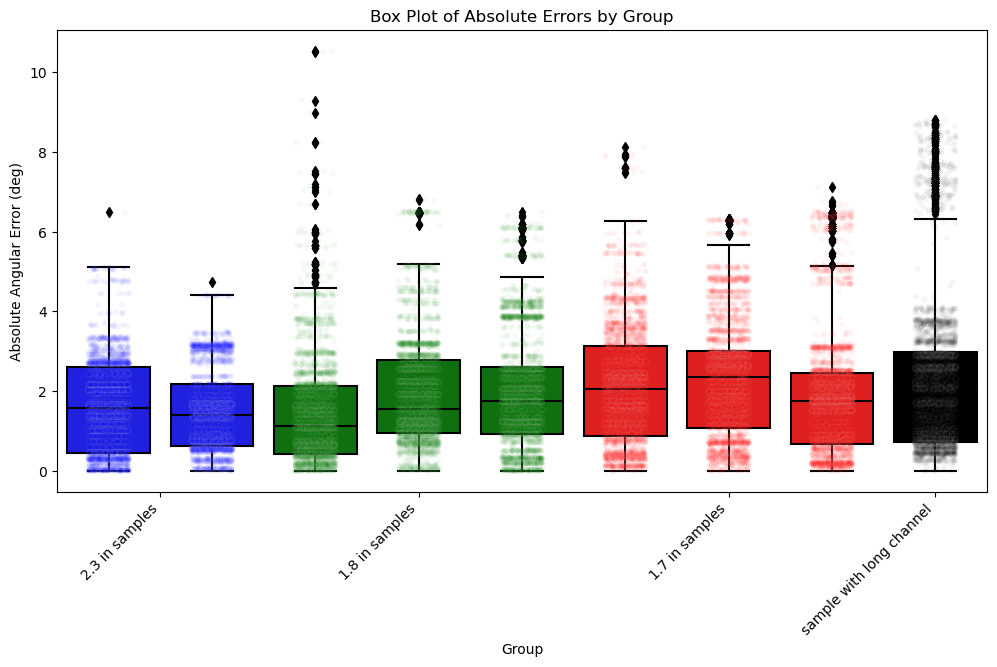

In [12]:
ma_100_list = []  # Will hold lists of min angle values per group
error_data_dict = {}  # Dictionary for box plot: {sample_name: error_values}
group_dict = {}  # Dictionary to map samples to groups

group_names = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
bar_labels = ['2.3 in samples', '1.8 in samples', '1.7 in samples', 'sample with long channel']
colors = ["b", "g", "r", "k"]  # Assign different colors to different groups

for i, group in enumerate([group_1, group_2, group_3, group_4]):  # Loop over groups
    group_values = []  # Holds min angle values per group

    for j, datafiles in enumerate(group):  # Loop over datasets in each group
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_bw_01()
        g.train_model_test_accuracy()
        
        # Get min accuracy values (for bar chart)
        min_angle_100, min_acc = g.get_min_accuracy_100()
        group_values.append(min_angle_100)  # Collect values per group
        
        # Use cross_validation_angular_error to get error data
        mean_error, std_error, predictions_df = g.cross_validation_angular_error()

        if not isinstance(predictions_df, pd.DataFrame):
            raise TypeError(f"Expected cross_validation_angular_error to return a DataFrame, got {type(predictions_df)}")

        # Ensure the DataFrame contains the 'Absolute Error' column
        if "Absolute Error" not in predictions_df.columns:
            raise ValueError(f"Dataset from {datafiles} does not contain 'Absolute Error' column")

        # Assign unique sample names and store error values
        sample_name = f"Group{i+1}_Sample{j+1}"  
        error_data_dict[sample_name] = predictions_df['Absolute Error'].tolist()
        group_dict[sample_name] = group_names[i]  # Assign to group

    ma_100_list.append(group_values)  # Append each group’s results as a sublist


# Define colors for each group
group_colors = ["blue", "green", "red", "black"]  # Make sure colors match the order of groups

bar_labels = ['2.3 in samples', '1.8 in samples', '1.7 in samples', 'sample with long channel']

    
g.plot_box_plot(error_data_dict, group_dict, group_colors, bar_labels, alpha=0.04, jitter=0.2)

    
    


### Use one dataset to train model and apply to others.  Obtain min accuracy plot as well as pair wise accuracy plot

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p3\\Bending_data_abs_2p3_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/first\\Bending_data_abs_1p822_s1_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/fourth\\Bending_data_abs_1p897_s4_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC m

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/first test\\Bending_data_abs_1p7_abs_1p7_1st_reapply_2_4_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p3\\Bending_data_abs_2p3_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/first\\Bending_data_abs_1p822_s1_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized bw 0-1. AD

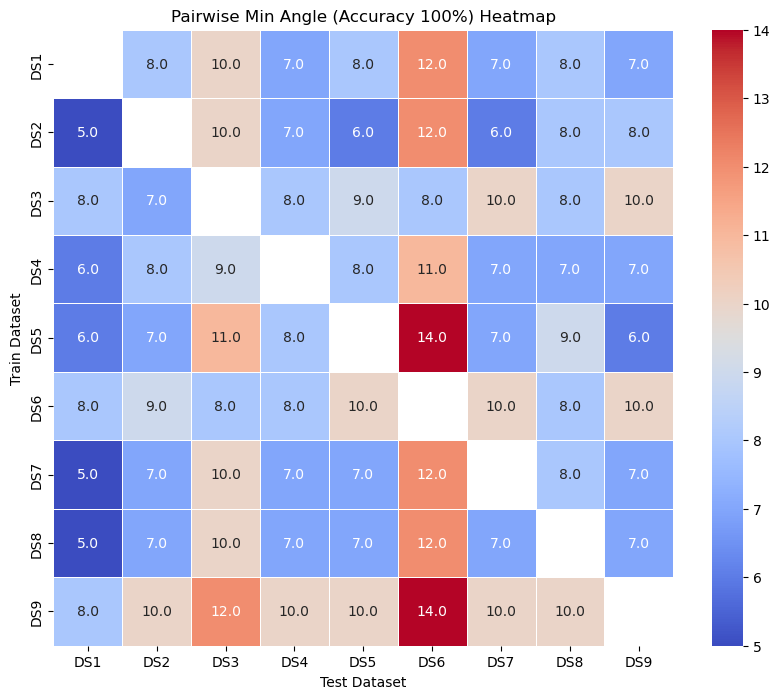

In [13]:
# Define dataset paths with names
DS_all = [
    ("DS1", os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p3/*.csv")),
    ("DS2", os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p31/*.csv")),
    ("DS3", os.path.join(path_to_repository , "CSV Data/12_9_2024/first/*.csv")),
    ("DS4", os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")),
    ("DS5", os.path.join(path_to_repository , "CSV Data/12_9_2024/fourth/*.csv")),
    ("DS6", os.path.join(path_to_repository , "CSV Data/2_4_2025/first test/*.csv")),
    ("DS7", os.path.join(path_to_repository , "CSV Data/2_6_2025/first test/*.csv")),
    ("DS8", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p732/*.csv")),
    ("DS9", os.path.join(path_to_repository , "CSV Data/10_25_2024/voltage divider circuit/*.csv"))
]

# Initialize results list
results = []

# Iterate over each dataset as the training dataset
for i, (train_name, train_datafiles) in enumerate(DS_all):
    # Initialize and train model
    g = bender_class()
    g.load_data(train_datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()
    
    # Test the trained model on all other datasets
    for j, (test_name, test_datafiles) in enumerate(DS_all):
        if i == j:
            continue  # Skip training on the same dataset

        # Load test dataset
        g_test = bender_class()
        g_test.load_data(test_datafiles)
        g_test.normalize_adc_bw_01()
        df_test = g_test.data
        
        # Run multiple accuracy tests
        acc = []
        for _ in range(10): 
            _, dftest_split = train_test_split(df_test, test_size=0.1, shuffle=True, random_state=42)
            acc.append(g.predict_new_data(dftest_split))
        
        # Convert accuracy list to numpy array
        acc = np.vstack((acc))
        
        # Get min angle where accuracy is 100%
        min_angle_100, _ = g.get_min_accuracy_100(accuracy_matrix=acc)

        # Store results
        results.append({
            "train_dataset": train_name,
            "test_dataset": test_name,
            "min_angle_100": min_angle_100
        })

# Convert results to Pandas DataFrame
df_results = pd.DataFrame(results)

g.plot_pairwise_min_angle_heatmap(df_results)


### box plot of error:  train on one sample data and test on others using cross_validation_external_test(external_datasets, n_splits=10)

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p3\\Bending_data_abs_2p3_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p31\\Bending_data_abs_2p31_11_25_24_0deg_reapply_1.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/first\\Bending_data_abs_1p822_s1_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/second\\Bending_data_abs_1p86_s2real_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_9_2024/fourth\\Bending_data_abs_1p897_s4_12_9_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC m

ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_4_2025/first test\\Bending_data_abs_1p7_abs_1p7_1st_reapply_2_4_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_6_2025/first test\\Bending_data_abs_1p7_abs_1p758_1st_reapply_2_6_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p732\\Bending_data_abs_1p732_0deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/10_25_2024/voltage divider circuit\\Bending_data_10_25_2024_v1_vd_silicone_glue.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/2

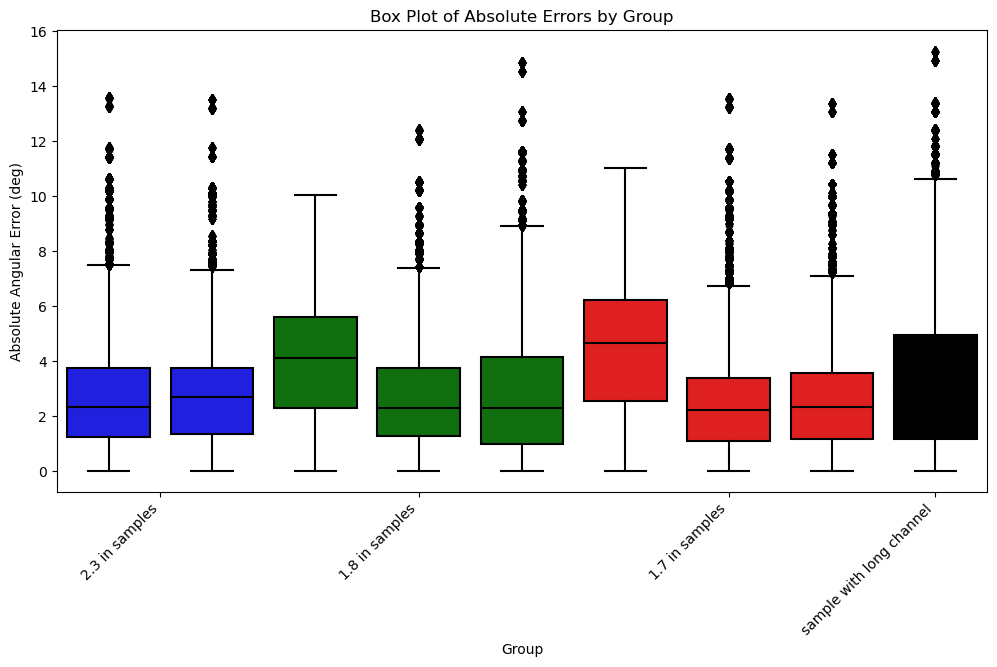

In [26]:


# Define dataset groups
group_1 = [
    ("DS1", os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p3/*.csv")),
    ("DS2", os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p31/*.csv"))
]

group_2 = [
    ("DS3", os.path.join(path_to_repository , "CSV Data/12_9_2024/first/*.csv")),
    ("DS4", os.path.join(path_to_repository , "CSV Data/12_9_2024/second/*.csv")),
    ("DS5", os.path.join(path_to_repository , "CSV Data/12_9_2024/fourth/*.csv"))
]

group_3 = [
    ("DS6", os.path.join(path_to_repository , "CSV Data/2_4_2025/first test/*.csv")),
    ("DS7", os.path.join(path_to_repository , "CSV Data/2_6_2025/first test/*.csv")),
    ("DS8", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p732/*.csv"))
]

group_4 = [
    ("DS9", os.path.join(path_to_repository , "CSV Data/10_25_2024/voltage divider circuit/*.csv"))
]

all_groups = [group_1, group_2, group_3, group_4]

# Initialize data storage
error_data_dict = {}  # Stores {trained_dataset: list_of_absolute_errors}
group_dict = {}  # Maps trained dataset names to groups

# Define group names and colors
group_names = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
bar_labels = ['2.3 in samples', '1.8 in samples', '1.7 in samples', 'sample with long channel']
group_colors = ["blue", "green", "red", "black"]  # Consistent color mapping

# Map datasets to groups
group_mapping = {
    "DS1": group_names[0], "DS2": group_names[0],
    "DS3": group_names[1], "DS4": group_names[1], "DS5": group_names[1],
    "DS6": group_names[2], "DS7": group_names[2], "DS8": group_names[2],
    "DS9": group_names[3],
}

# Flatten dataset list for iteration
DS_all = sum(all_groups, [])  # Converts groups into a single list of (dataset name, file path)

# Iterate over each dataset as the training dataset
for i_d, (train_name, train_datafiles) in enumerate(DS_all):
    g = bender_class()
    g.load_data(train_datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()

    # Collect datasets to use as the combined external test datasets (all except the training dataset)
    external_datasets = []
    for j_d, (test_name, test_datafiles) in enumerate(DS_all):
        if i_d == j_d:
            continue  # Skip the dataset that was used for training

        g_test = bender_class()
        g_test.load_data(test_datafiles)
        g_test.normalize_adc_bw_01()
        external_datasets.append(g_test)  # Append instances of bender_class

    # Run cross-validation using external datasets
    mean_error, std_error, predictions_df = g.cross_validation_external_test(external_datasets, n_splits=10)

    # Validate returned predictions DataFrame
    if not isinstance(predictions_df, pd.DataFrame):
        raise TypeError(f"Expected cross_validation_external_test to return a DataFrame, got {type(predictions_df)}")

    if "Absolute Error" not in predictions_df.columns:
        raise ValueError(f"Dataset from {train_name} does not contain 'Absolute Error' column")

    # Store results in structured format for box plot
    error_data_dict[train_name] = predictions_df["Absolute Error"].tolist()
    group_dict[train_name] = group_mapping[train_name]  # Assign dataset to its group

# Generate box plot using the existing g.plot_box_plot method
g.plot_box_plot(error_data_dict, group_dict, group_colors, bar_labels, alpha=0.00, jitter=0.9)
